In [26]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import Input
import matplotlib.pyplot as plt

# Define model
inputs = Input(shape=(5, 2))
lstm = tf.keras.layers.LSTM(4)
softmax = tf.keras.layers.Softmax()
output = softmax(lstm(inputs))
model = Model(inputs=inputs, outputs=output, name="my_lstm")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["acccuracy"])

# Model summary
model.summary()

Model: "my_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5, 2)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 4)                 112       
                                                                 
 softmax (Softmax)           (None, 4)                 0         
                                                                 
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________


2023-06-03 16:02:17.336456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-03 16:02:17.338272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-03 16:02:17.339384: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [27]:
from tensorflow.keras import mixed_precision

In [28]:
# Forward pass
X = tf.random.normal((10, 5, 2))
pred = model(X)
print(pred)

tf.Tensor(
[[0.27123958 0.25187114 0.23030938 0.24657989]
 [0.26293945 0.29900557 0.20734449 0.23071058]
 [0.23913832 0.24897358 0.25782627 0.2540619 ]
 [0.25489834 0.34450364 0.19037564 0.21022233]
 [0.24794777 0.2443662  0.24748741 0.26019865]
 [0.23818164 0.23523147 0.27215865 0.2544282 ]
 [0.27679008 0.26645622 0.21317078 0.2435829 ]
 [0.23862307 0.24031739 0.27055687 0.2505026 ]
 [0.25183475 0.27509844 0.23191462 0.24115218]
 [0.22928561 0.26694405 0.26757208 0.23619834]], shape=(10, 4), dtype=float32)


In [29]:
for layer in model.layers:
    weights = layer.get_weights()  # list of numpy arrays
    print(weights)
    if len(weights)>0:
        for w in weights:
            print(w.shape)
    print("=======")

[]
[array([[-0.2069228 ,  0.40462273, -0.32538378, -0.04289359, -0.40116835,
        -0.08921412,  0.47144818, -0.40504515,  0.05497313,  0.35931832,
         0.43721557,  0.1206941 ,  0.45659363,  0.35656506,  0.24669719,
        -0.55674005],
       [-0.11804718, -0.46265638,  0.24620456,  0.5496801 ,  0.12474322,
        -0.34668553, -0.540701  , -0.45192927, -0.11347097, -0.34593245,
         0.17625016,  0.05690467, -0.5216659 , -0.03529042,  0.20247239,
         0.18512535]], dtype=float32), array([[ 0.05771697,  0.38875887, -0.33764833,  0.21329677,  0.09481674,
        -0.09375452,  0.02446317, -0.1686244 ,  0.3591991 ,  0.387729  ,
        -0.12581839,  0.42420346,  0.26710176,  0.16823807,  0.244974  ,
        -0.06651726],
       [ 0.00477441,  0.18463032,  0.15577446,  0.50115985,  0.24659641,
        -0.22120088, -0.44689465, -0.01093152, -0.01454349, -0.22840056,
         0.1572355 , -0.02360389, -0.29542735, -0.17172858,  0.17903157,
        -0.39294934],
       [ 0.0426

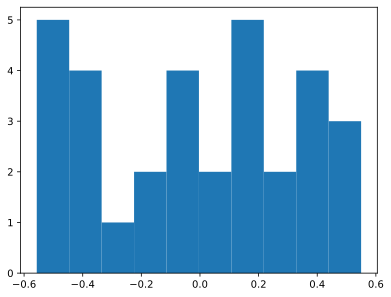

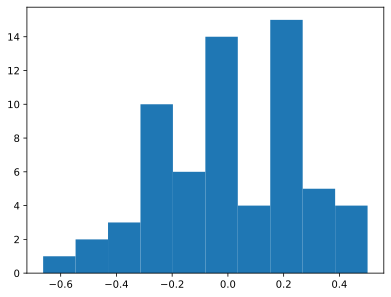

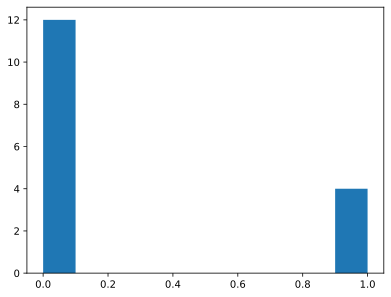

In [30]:
for layer in model.layers:
    weights = layer.get_weights()  # list of numpy arrays
    for weight in weights:
        plt.hist(weight.flatten())
        plt.show()

In [33]:
import tensorflow as tf

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
x_sample = tf.random.normal((3, 5, 2))
y_sample = [1, 2, 2]

# suppose x_sample and y_sample are your input features and labels
y_pred = model.predict(x_sample)

loss = loss_fn(y_sample, y_pred)
print('Loss:', loss.numpy())

1/1 [==============================] - 0s 26ms/step
Loss: 1.4036379


In [15]:
import numpy as np
import tensorflow as tf

num_samples = 100
seq_length = 10
num_features = 2
num_classes = 5
train_ratio = 0.8
num_lstm_cells = 10
train_split = int(train_ratio*num_samples)

# Generate sequential data where each value depends on the previous one
X = np.empty((num_samples, seq_length, num_features))
for i in range(num_samples):
    for j in range(seq_length):
        for k in range(num_features):
            if j > 0:
                X[i, j, k] = X[i, j - 1, k] * 0.9 + np.random.normal(0, 0.1)
            else:
                X[i, j, k] = np.random.normal(0, 0.1)

# Generate labels that are a function of the last value in each sequence
y = np.sum(X[:, -1, :], axis=1)
y = np.round(y).astype(int)  # convert to integers for classification
y = np.clip(y, 0, num_classes - 1)  # clip to the range 0 to num_classes - 1
y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split:]
y_test = y[train_split:]

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(num_lstm_cells, input_shape=(seq_length, num_features)),  # LSTM layer
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-06-03 17:38:01.841365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-03 17:38:01.842579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-03 17:38:01.844017: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=tensorboard_callback)

Epoch 1/100
3/3 [==============================] - 0s 44ms/step - loss: 0.0856 - accuracy: 0.9625 - val_loss: 0.0288 - val_accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0853 - accuracy: 0.9625 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0845 - accuracy: 0.9625 - val_loss: 0.0293 - val_accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0841 - accuracy: 0.9625 - val_loss: 0.0302 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0834 - accuracy: 0.9625 - val_loss: 0.0302 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0829 - accuracy: 0.9625 - val_loss: 0.0293 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0822 - accuracy: 0.9625 - val_loss: 0.0288 - val_accuracy: 1.0000
Epoch 8/100
3/3 [===

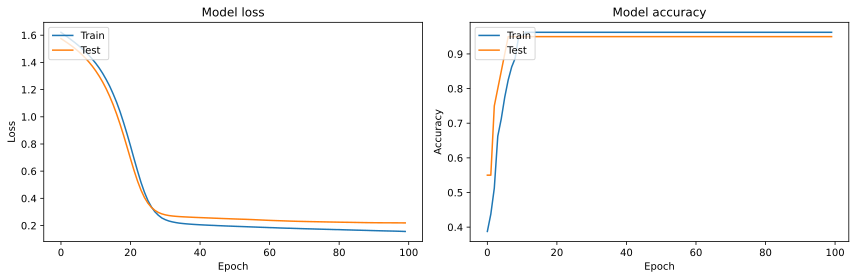

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()